
# Somerville Happiness Survey Analysis

#### By Livia John

##### STAT 2332: Probability and Data Analysis

##### Background: Every two years, the City of Somerville sends out a happiness survey to a random sample of Somerville residents. The survey asks residents to rate their personal happiness, wellbeing, and satisfaction with City services. This combined dataset includes the survey responses from 2011 to 2021.
######     
###### Source of Data Set: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-Responses/bi8e-5vw8/about_data 

---
## Setting up the environment:

In [3]:
library(tidyverse)
library(ggplot2)
library(corrplot)
library(dplyr)
library(knitr)


---

## The data at a glance:

In [13]:
happy_data <- read.csv("data/happy.csv")
head(happy_data, 5)

,ID,Year,Happiness.Level,Satisfaction.Level,City.Satisfaction,Gender,Age,Marital.Status,Ethnicity,Children,Annual.Household.Income,Household.Income.Mid
,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2,2011,7,8,9,Female,55-64,Divorced,White,no,"$50,000 to $74,999",70000
2,4,2011,10,10,10,Female,65-74,Divorced,Two or more races,no,"$50,000 to $74,999",50000
3,6,2011,8,8,8,Male,55-64,Divorced,White,no,"$25,000 to $49,999",30000
4,8,2011,10,10,8,Female,75+,Widowed,Black or African American,no,"Less than $25,000",10000
5,10,2011,5,5,7,Male,55-64,Married,White,no,"$50,000 to $74,999",70000


In [14]:
data_dimensions <- dim(happy_data)
print(data_dimensions)

[1] 9540   12


In [15]:
summary(happy_data)

       ID             Year      Happiness.Level  Satisfaction.Level
 Min.   :    2   Min.   :2011   Min.   : 1.000   Min.   : 1.000    
 1st Qu.: 1628   1st Qu.:2011   1st Qu.: 7.000   1st Qu.: 7.000    
 Median : 3868   Median :2011   Median : 8.000   Median : 8.000    
 Mean   : 4341   Mean   :2014   Mean   : 7.468   Mean   : 7.679    
 3rd Qu.: 6511   3rd Qu.:2019   3rd Qu.: 9.000   3rd Qu.: 9.000    
 Max.   :10742   Max.   :2021   Max.   :10.000   Max.   :10.000    
                                                 NA's   :35        
 City.Satisfaction    Gender              Age            Marital.Status    
 Min.   : 1.000    Length:9540        Length:9540        Length:9540       
 1st Qu.: 7.000    Class :character   Class :character   Class :character  
 Median : 8.000    Mode  :character   Mode  :character   Mode  :character  
 Mean   : 7.728                                                            
 3rd Qu.: 9.000                                                            


---

## Income Level and Happiness Analysis

#### Research Question: How does household income correlate with reported happiness levels among Somerville residents?


In [22]:
unique_incomes <- unique(happy_data$Household.Income.Mid)
print(unique_incomes)

 [1]  70000  50000  30000  10000  90000 170000 110000 250000 150000 130000
[11] 190000   5000  37500  17500  15000  62500  87500 125000 200000 175000
[21] 225000


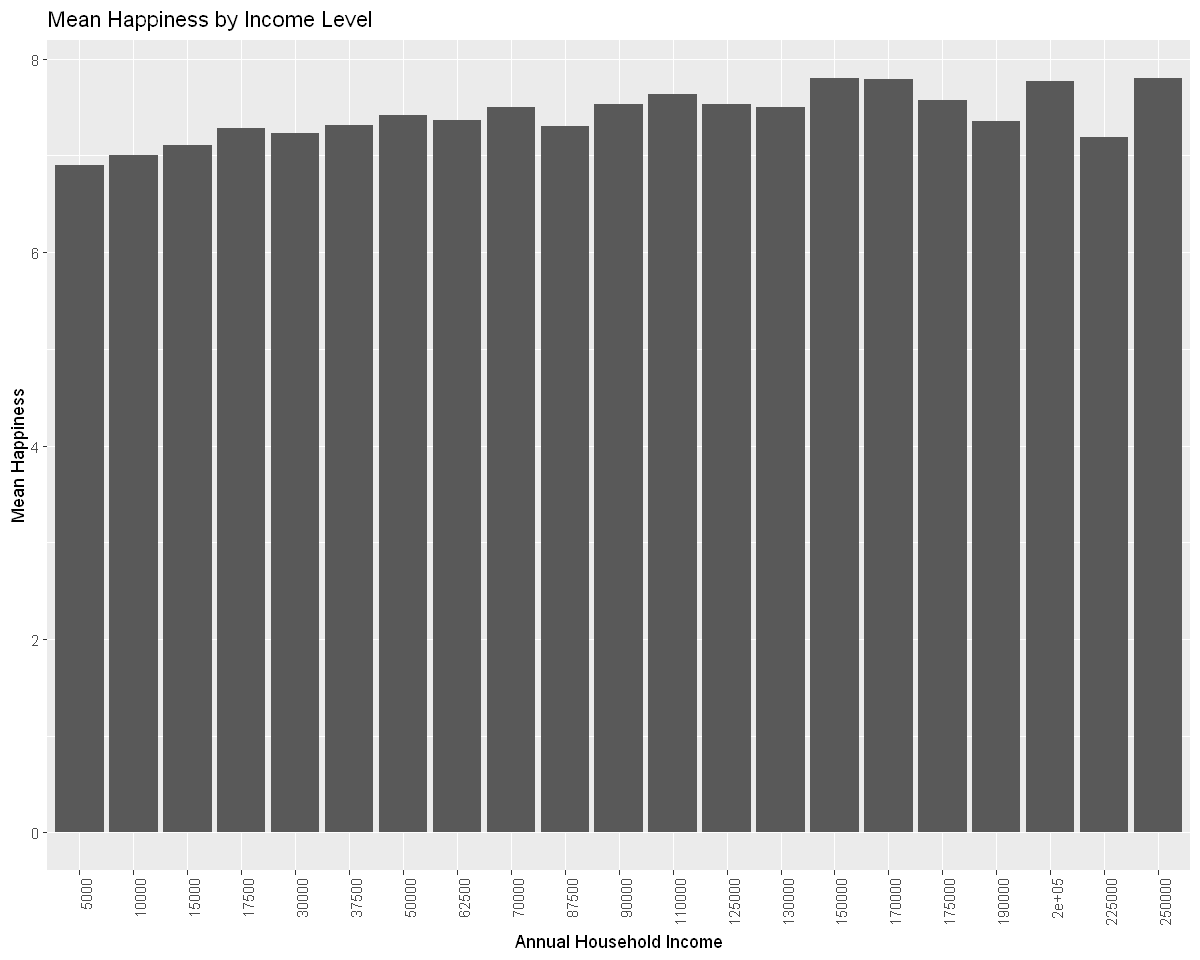

In [29]:
# Convert Household.Income.Mid to a factor with levels ordered numerically
happy_data$Household.Income.Mid <- factor(happy_data$Household.Income.Mid, levels = unique(happy_data$Household.Income.Mid))

# Subset the data
data_subset <- happy_data %>%
  select(Happiness.Level, Household.Income.Mid)

# Group data by income level
grouped_data <- data_subset %>%
  group_by(Household.Income.Mid)

# Calculate summary statistics for happiness within each income group
summary_stats <- grouped_data %>%
  summarise(mean_happiness = mean(Happiness.Level, na.rm = TRUE),
            median_happiness = median(Happiness.Level, na.rm = TRUE))

# Visualize the relationship between income level and happiness
ggplot(summary_stats, aes(x = Household.Income.Mid, y = mean_happiness)) +
  geom_bar(stat = "identity") +
  labs(x = "Annual Household Income", y = "Mean Happiness", title = "Mean Happiness by Income Level") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
options(repr.plot.width = 10, repr.plot.height = 8)

In [92]:
# Reshape summary_stats data
summary_table <- data.frame(Income_Level = summary_stats$Household.Income.Mid,
                            Mean_Happiness = summary_stats$mean_happiness)

# Print the table
kable(summary_table, col.names = c("Household Income Mid", "Mean Happiness"))



| Household Income Mid| Mean Happiness|
|--------------------:|--------------:|
|                 5000|       6.900000|
|                10000|       7.000000|
|                15000|       7.112805|
|                17500|       7.278481|
|                30000|       7.231694|
|                37500|       7.312057|
|                50000|       7.416819|
|                62500|       7.361423|
|                70000|       7.497807|
|                87500|       7.306043|
|                90000|       7.531250|
|               110000|       7.632653|
|               125000|       7.531065|
|               130000|       7.500000|
|               150000|       7.800000|
|               170000|       7.785714|
|               175000|       7.570652|
|               190000|       7.357143|
|               200000|       7.766773|
|               225000|       7.187500|
|               250000|       7.805556|

In [89]:
correlation <- cor(happy_data$Household.Income.Mid, happy_data$Happiness.Level)

# Print the correlation coefficient
print(correlation)

[1] 0.1070491


In [8]:
correlation_matrix <- cor(happy_data[, sapply(happy_data, is.numeric)], use = "pairwise.complete.obs")

# View the correlation matrix
print(correlation_matrix)

                                ID        Year Happiness.Level
ID                    1.0000000000  0.43855852     -0.01475855
Year                  0.4385585182  1.00000000     -0.01934336
Happiness.Level      -0.0147585462 -0.01934336      1.00000000
Satisfaction.Level   -0.0006226056  0.01352863      0.75883493
City.Satisfaction    -0.0220873654 -0.08031993      0.46941808
Household.Income.Mid  0.0707107862  0.17726064      0.10704906
                     Satisfaction.Level City.Satisfaction Household.Income.Mid
ID                        -0.0006226056       -0.02208737           0.07071079
Year                       0.0135286339       -0.08031993           0.17726064
Happiness.Level            0.7588349331        0.46941808           0.10704906
Satisfaction.Level         1.0000000000        0.36346450           0.15017250
City.Satisfaction          0.3634645028        1.00000000           0.06544500
Household.Income.Mid       0.1501725006        0.06544500           1.00000000



#### *The correlation coefficient between income level and happiness is 0.1070491, indicating a very weak positive correlation and suggesting that income level is not a reliable predictor of happiness.*

---

## Maritial Status and Happiness Analysis

In [117]:
happy_data <- happy_data %>% filter(Marital.Status != "")

# Group data by Marital.Status
grouped_data <- happy_data %>%
  group_by(Marital.Status)

# Calculate summary statistics for happiness within each marital status group
summary_stats <- grouped_data %>%
  summarise(mean_happiness = mean(Happiness.Level, na.rm = TRUE))

# Print summary statistics
print(summary_stats)

# A tibble: 5 × 2
  Marital.Status                         mean_happiness
  <chr>                                           <dbl>
1 Divorced/ Separated                              7.51
2 Living with a partner, but not married           7.24
3 Married                                          7.65
4 Single, Never Married                            7.11
5 Widowed                                          7.69



#### *The findings reveal varying levels of reported happiness across different marital statuses, with widowed individuals indicating the highest average happiness (7.69), followed by married individuals (7.65), while those who have never married report the lowest average happiness level (7.11).*

---

## Comparison of Happiness Levels: With and Without Children

In [115]:
happy_data <- happy_data %>% filter(Children != "")

# Group data by Marital.Status
grouped_data <- happy_data %>%
  group_by(Children)

# Calculate summary statistics for happiness within each marital status group
summary_stats <- grouped_data %>%
  summarise(mean_happiness = mean(Happiness.Level, na.rm = TRUE))

# Print summary statistics
print(summary_stats)

# A tibble: 2 × 2
  Children mean_happiness
  <chr>             <dbl>
1 no                 7.44
2 yes                7.55




#### *The findings indicate a slight difference in reported happiness levels between individuals with children (7.55) and those without children (7.44), suggesting that the presence of children may have a marginal positive impact on reported happiness.*

---
## Race and Happiness Analysis

In [133]:
happy_data <- happy_data %>% filter(Ethnicity != "")

# Group data by Marital.Status
grouped_data <- happy_data %>%
  group_by(Ethnicity)

# Calculate summary statistics for happiness within each marital status group
summary_stats <- grouped_data %>%
  summarise(mean_happiness = mean(Happiness.Level, na.rm = TRUE))

# Print summary statistics
print(summary_stats)

# A tibble: 6 × 2
  Ethnicity                 mean_happiness
  <chr>                              <dbl>
1 Another race                        7.64
2 Asian or Pacific Islander           7.58
3 Black or African American           7.65
4 Hispanic or Latino                  7.77
5 Two or more races                   7.29
6 White                               7.45



#### *The findings reveal variations in reported happiness levels across different ethnicities, with Hispanic or Latino individuals indicating the highest average happiness (7.77), while those identifying as Two or more races report the lowest average happiness level (7.29).*